In [1]:
import scipy.optimize as so
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rn

In [2]:
def fitnessFunction(X):
    v = float(X)
    m = 1 + (np.cos(0.04*v))**2
    n = np.exp((- (v) **2 )/(20000))
    return m * n

In [3]:
X = []
for i in range(-500, 500, 1):
    X = X + [i]

In [4]:
Y = []
for i in X:
    Y = Y + [fitnessFunction(i)]

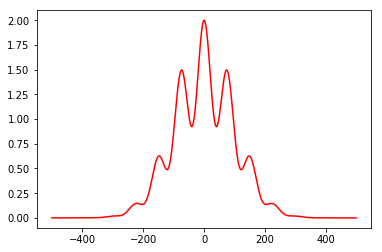

In [5]:
plt.plot(X, Y, color = 'red')
plt.show()

In [6]:
def cost_function(X): return -fitnessFunction(X)

In [7]:
interval = (-500, 500)

In [8]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = 250
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [9]:
def temperature(fraction):
    """ Example of temperature dicreasing as the process goes on."""
    return max(10, min(10, 10 - fraction))

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p
    
def random_neighbour(x, fraction=50):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [10]:
temperature(100)
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=10000, debug=True)

Step # 0/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 1/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 2/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 3/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 4/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 5/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 6/10000 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0748 ...
Step # 7/10000 : T =   10, state =  250, cost = -0.0748, new_state =  250, new_cost = -0.0748 ...
Step # 8/10000 : T =   10, state =  250, cost = -0.0748, new_state =  250, new_cost = -0.0747 ...
Step # 9/10000 : T =   10, state =  250, cost = -0.0747, new_state =  250, new_cost = -0.0748 ...
Step #10/10000 : T =

Step #1422/10000 : T =   10, state =  237, cost = -0.119, new_state =  238, new_cost = -0.118 ...
Step #1423/10000 : T =   10, state =  238, cost = -0.118, new_state =  243, new_cost = -0.101 ...
Step #1424/10000 : T =   10, state =  243, cost = -0.101, new_state =  238, new_cost = -0.117 ...
Step #1425/10000 : T =   10, state =  238, cost = -0.117, new_state =  236, new_cost = -0.125 ...
Step #1426/10000 : T =   10, state =  236, cost = -0.125, new_state =  230, new_cost = -0.139 ...
Step #1427/10000 : T =   10, state =  230, cost = -0.139, new_state =  226, new_cost = -0.144 ...
Step #1428/10000 : T =   10, state =  226, cost = -0.144, new_state =  219, new_cost = -0.147 ...
Step #1429/10000 : T =   10, state =  219, cost = -0.147, new_state =  225, new_cost = -0.146 ...
Step #1430/10000 : T =   10, state =  225, cost = -0.146, new_state =  220, new_cost = -0.147 ...
Step #1431/10000 : T =   10, state =  220, cost = -0.147, new_state =  225, new_cost = -0.146 ...
Step #1432/10000 : T

Step #2432/10000 : T =   10, state =  265, cost = -0.0348, new_state =  255, new_cost = -0.0578 ...
Step #2433/10000 : T =   10, state =  255, cost = -0.0578, new_state =  257, new_cost = -0.0529 ...
Step #2434/10000 : T =   10, state =  257, cost = -0.0529, new_state =  255, new_cost = -0.0599 ...
Step #2435/10000 : T =   10, state =  255, cost = -0.0599, new_state =  243, new_cost = -0.101 ...
Step #2436/10000 : T =   10, state =  243, cost = -0.101, new_state =  247, new_cost = -0.0848 ...
Step #2437/10000 : T =   10, state =  247, cost = -0.0848, new_state =  254, new_cost = -0.0611 ...
Step #2438/10000 : T =   10, state =  254, cost = -0.0611, new_state =  248, new_cost = -0.0813 ...
Step #2439/10000 : T =   10, state =  248, cost = -0.0813, new_state =  240, new_cost = -0.109 ...
Step #2440/10000 : T =   10, state =  240, cost = -0.109, new_state =  244, new_cost = -0.0965 ...
Step #2441/10000 : T =   10, state =  244, cost = -0.0965, new_state =  243, new_cost = -0.0995 ...
Step

Step #3892/10000 : T =   10, state = -358, cost = -0.0017, new_state = -371, new_cost = -0.00146 ...
Step #3893/10000 : T =   10, state = -371, cost = -0.00146, new_state = -386, new_cost = -0.00112 ...
Step #3894/10000 : T =   10, state = -386, cost = -0.00112, new_state = -378, new_cost = -0.00134 ...
Step #3895/10000 : T =   10, state = -378, cost = -0.00134, new_state = -364, new_cost = -0.00154 ...
Step #3896/10000 : T =   10, state = -364, cost = -0.00154, new_state = -362, new_cost = -0.00158 ...
Step #3897/10000 : T =   10, state = -362, cost = -0.00158, new_state = -366, new_cost = -0.00152 ...
Step #3898/10000 : T =   10, state = -366, cost = -0.00152, new_state = -364, new_cost = -0.00155 ...
Step #3899/10000 : T =   10, state = -364, cost = -0.00155, new_state = -364, new_cost = -0.00155 ...
Step #3900/10000 : T =   10, state = -364, cost = -0.00155, new_state = -384, new_cost = -0.00119 ...
Step #3901/10000 : T =   10, state = -384, cost = -0.00119, new_state = -373, new_c

Step #4931/10000 : T =   10, state = -281, cost = -0.0204, new_state = -269, new_cost = -0.028 ...
Step #4932/10000 : T =   10, state = -269, cost = -0.028, new_state = -251, new_cost = -0.0717 ...
Step #4933/10000 : T =   10, state = -251, cost = -0.0717, new_state = -258, new_cost = -0.0493 ...
Step #4934/10000 : T =   10, state = -258, cost = -0.0493, new_state = -264, new_cost = -0.0365 ...
Step #4935/10000 : T =   10, state = -264, cost = -0.0365, new_state = -240, new_cost = -0.109 ...
Step #4936/10000 : T =   10, state = -240, cost = -0.109, new_state = -222, new_cost = -0.147 ...
Step #4937/10000 : T =   10, state = -222, cost = -0.147, new_state = -197, new_cost = -0.143 ...
Step #4938/10000 : T =   10, state = -197, cost = -0.143, new_state = -181, new_cost = -0.256 ...
Step #4939/10000 : T =   10, state = -181, cost = -0.256, new_state = -202, new_cost = -0.137 ...
Step #4940/10000 : T =   10, state = -202, cost = -0.137, new_state = -205, new_cost = -0.136 ...
Step #4941/10

Step #5931/10000 : T =   10, state =    7, cost = -1.92, new_state =  -22, new_cost = -1.37 ...
Step #5932/10000 : T =   10, state =  -22, cost = -1.37, new_state = -30.8, new_cost = -1.06 ...
Step #5933/10000 : T =   10, state = -30.8, cost = -1.06, new_state = -20.2, new_cost = -1.45 ...
Step #5934/10000 : T =   10, state = -20.2, cost = -1.45, new_state = -41.1, new_cost = -0.924 ...
Step #5935/10000 : T =   10, state = -20.2, cost = -1.45, new_state = 0.868, new_cost =   -2 ...
Step #5936/10000 : T =   10, state = 0.868, cost =   -2, new_state = -22.9, new_cost = -1.34 ...
Step #5937/10000 : T =   10, state = -22.9, cost = -1.34, new_state = -14.8, new_cost = -1.67 ...
Step #5938/10000 : T =   10, state = -14.8, cost = -1.67, new_state = 12.4, new_cost = -1.76 ...
Step #5939/10000 : T =   10, state = 12.4, cost = -1.76, new_state = 1.75, new_cost = -1.99 ...
Step #5940/10000 : T =   10, state = 1.75, cost = -1.99, new_state = 5.51, new_cost = -1.95 ...
Step #5941/10000 : T =   10, 

Step #7139/10000 : T =   10, state = -361, cost = -0.00161, new_state = -363, new_cost = -0.00157 ...
Step #7140/10000 : T =   10, state = -363, cost = -0.00157, new_state = -369, new_cost = -0.00148 ...
Step #7141/10000 : T =   10, state = -369, cost = -0.00148, new_state = -341, new_cost = -0.00356 ...
Step #7142/10000 : T =   10, state = -341, cost = -0.00356, new_state = -329, new_cost = -0.00773 ...
Step #7143/10000 : T =   10, state = -329, cost = -0.00773, new_state = -342, new_cost = -0.0035 ...
Step #7144/10000 : T =   10, state = -342, cost = -0.0035, new_state = -323, new_cost = -0.0103 ...
Step #7145/10000 : T =   10, state = -323, cost = -0.0103, new_state = -357, new_cost = -0.00173 ...
Step #7146/10000 : T =   10, state = -357, cost = -0.00173, new_state = -367, new_cost = -0.00151 ...
Step #7147/10000 : T =   10, state = -367, cost = -0.00151, new_state = -381, new_cost = -0.00125 ...
Step #7148/10000 : T =   10, state = -381, cost = -0.00125, new_state = -410, new_cost

Step #8304/10000 : T =   10, state =  232, cost = -0.135, new_state =  215, new_cost = -0.145 ...
Step #8305/10000 : T =   10, state =  215, cost = -0.145, new_state =  257, new_cost = -0.0531 ...
Step #8306/10000 : T =   10, state =  257, cost = -0.0531, new_state =  255, new_cost = -0.0577 ...
Step #8307/10000 : T =   10, state =  255, cost = -0.0577, new_state =  289, new_cost = -0.0198 ...
Step #8308/10000 : T =   10, state =  289, cost = -0.0198, new_state =  276, new_cost = -0.0223 ...
Step #8309/10000 : T =   10, state =  276, cost = -0.0223, new_state =  265, new_cost = -0.035 ...
Step #8310/10000 : T =   10, state =  265, cost = -0.035, new_state =  273, new_cost = -0.0245 ...
Step #8311/10000 : T =   10, state =  273, cost = -0.0245, new_state =  239, new_cost = -0.115 ...
Step #8312/10000 : T =   10, state =  239, cost = -0.115, new_state =  211, new_cost = -0.141 ...
Step #8313/10000 : T =   10, state =  211, cost = -0.141, new_state =  209, new_cost = -0.139 ...
Step #8314

Step #9429/10000 : T =   10, state =  373, cost = -0.00142, new_state =  371, new_cost = -0.00146 ...
Step #9430/10000 : T =   10, state =  371, cost = -0.00146, new_state =  380, new_cost = -0.00129 ...
Step #9431/10000 : T =   10, state =  380, cost = -0.00129, new_state =  377, new_cost = -0.00136 ...
Step #9432/10000 : T =   10, state =  377, cost = -0.00136, new_state =  366, new_cost = -0.00152 ...
Step #9433/10000 : T =   10, state =  366, cost = -0.00152, new_state =  388, new_cost = -0.00104 ...
Step #9434/10000 : T =   10, state =  388, cost = -0.00104, new_state =  409, new_cost = -0.000388 ...
Step #9435/10000 : T =   10, state =  409, cost = -0.000388, new_state =  389, new_cost = -0.00103 ...
Step #9436/10000 : T =   10, state =  389, cost = -0.00103, new_state =  365, new_cost = -0.00154 ...
Step #9437/10000 : T =   10, state =  365, cost = -0.00154, new_state =  321, new_cost = -0.0111 ...
Step #9438/10000 : T =   10, state =  321, cost = -0.0111, new_state =  329, new_

(343.4374980496574,
 -0.003162221992089192,
 [250,
  250.0,
  249.996808532185,
  249.9896677794882,
  249.99151494330732,
  249.986335289135,
  250.0053242372451,
  250.01353697826272,
  250.02802871456313,
  250.03715450573532,
  250.01619288346674,
  250.02493633146895,
  250.0740472633682,
  250.04580748488414,
  250.0510043899018,
  249.985298632558,
  250.02090066124367,
  250.01284059070332,
  249.9299570637465,
  249.87097007522962,
  249.7797951841515,
  249.8748993464336,
  249.87455799143353,
  249.90832584943956,
  249.85744223545706,
  249.94537324601583,
  249.84023930119088,
  249.84078530438512,
  249.94756563019342,
  249.92856414022364,
  250.00029267624367,
  250.0805188588768,
  250.12938836044071,
  250.2756450203592,
  250.2332201046693,
  250.07705174294583,
  250.2468178257505,
  250.26792423908105,
  250.42100914997968,
  250.45714500571987,
  250.5774997183411,
  250.7021288044005,
  250.71793337598166,
  250.78334972613544,
  250.61825963953456,
  250.7127770

In [11]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=10000, debug=False)

print(c)
print(min(costs))

-0.01971978139419895
-1.99999948672573


In [12]:
for i in range(0,len(states)):
    if costs[i] == min(costs):
        print("Minimum is xmin = {} and ymin = {} in {} iterations.".format(states[i], costs[i], i))

Minimum is xmin = 0.01737602058583576 and ymin = -1.99999948672573 in 5174 iterations.


In [13]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


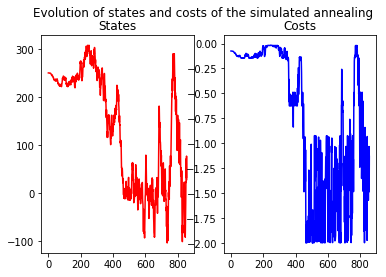

Number of times the algorithm reached the minimum for temperature 1 is 85%


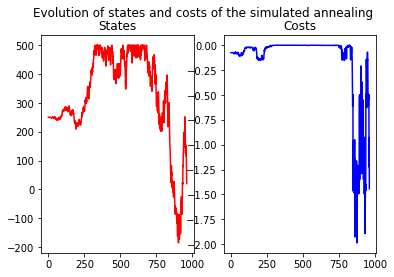

Number of times the algorithm reached the minimum for temperature 5 is 95%


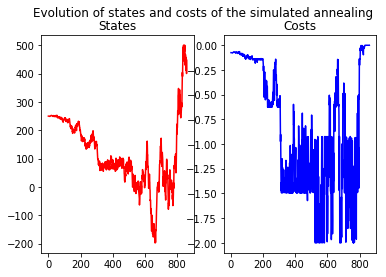

Number of times the algorithm reached the minimum for temperature 10 is 90%


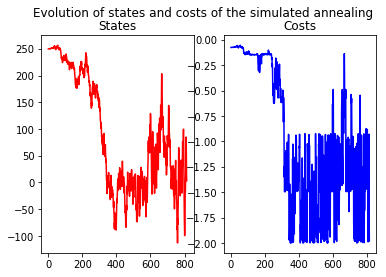

Number of times the algorithm reached the minimum for temperature 50 is 90%


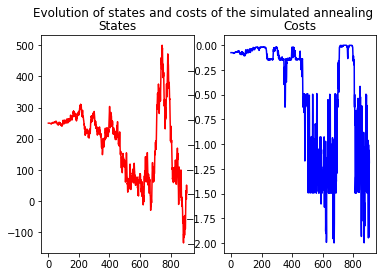

Number of times the algorithm reached the minimum for temperature 100 is 95%


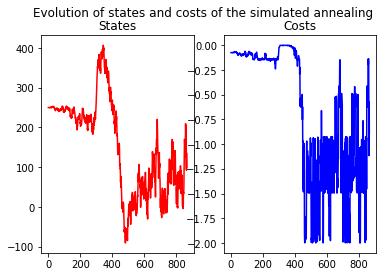

Number of times the algorithm reached the minimum for temperature 500 is 90%


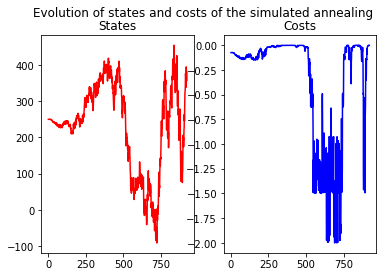

Number of times the algorithm reached the minimum for temperature 1000 is 95%


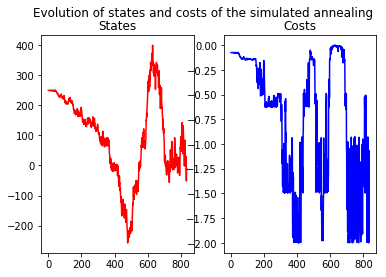

Number of times the algorithm reached the minimum for temperature 5000 is 85%


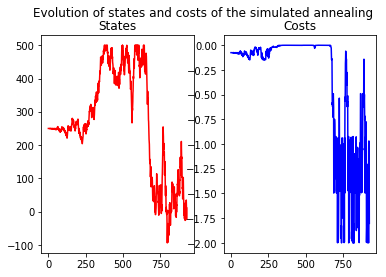

Number of times the algorithm reached the minimum for temperature 10000 is 95%


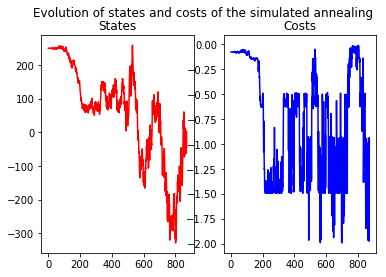

Number of times the algorithm reached the minimum for temperature 50000 is 85%


In [14]:
count = 0
initTemp = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
for t in initTemp:
    def temperature(t):
        return t
    count = 0
    for i in range(0,20):
        state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
        if min(costs) < -1.99:
            count = count + 1
    see_annealing(states, costs)
    print("Number of times the algorithm reached the minimum for temperature {} is {}%".format(t, count*5))
    